<a href="https://www.kaggle.com/code/karlpetz/video-game-sales-data-eda?scriptVersionId=105451748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import squarify

The notes below are my thoughts whilst I was exploring the data set. So most of it is just wild guessing and ranting feel free to read it or to take a look at the graphs. I am more than welcome to any criticsm:)


# Exploration

In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.groupby('Year').Global_Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1980.0,9.0,1.264444,1.383312,0.24,0.3400,0.770,1.1500,4.31
1981.0,46.0,0.777609,0.781827,0.13,0.3150,0.465,0.9600,4.50
1982.0,36.0,0.801667,1.257779,0.14,0.3350,0.540,0.7725,7.81
1983.0,17.0,0.987647,0.838947,0.17,0.4000,0.770,1.1300,3.20
1984.0,14.0,3.597143,7.200839,0.27,1.1300,1.485,2.0900,28.31
1985.0,14.0,3.852857,10.510655,0.02,0.4650,1.015,1.4550,40.24
1986.0,21.0,1.765238,1.330570,0.29,1.1400,1.360,2.2000,6.51
1987.0,16.0,1.358750,1.222892,0.07,0.4650,0.885,2.2125,4.38
1988.0,15.0,3.148000,4.413943,0.03,0.9700,1.510,3.1450,17.28


**2018, 2019 years are missing which is said in the description of the data set. Every other year is there. 2017 and 2020 the number of video games sales is very little compared to with previous years probably due to incomplete information. Therefore I will drop any rows in the year 2017 and 2020.**


<AxesSubplot:title={'center':'Tree map displaying the size of the different genres of videogames'}>

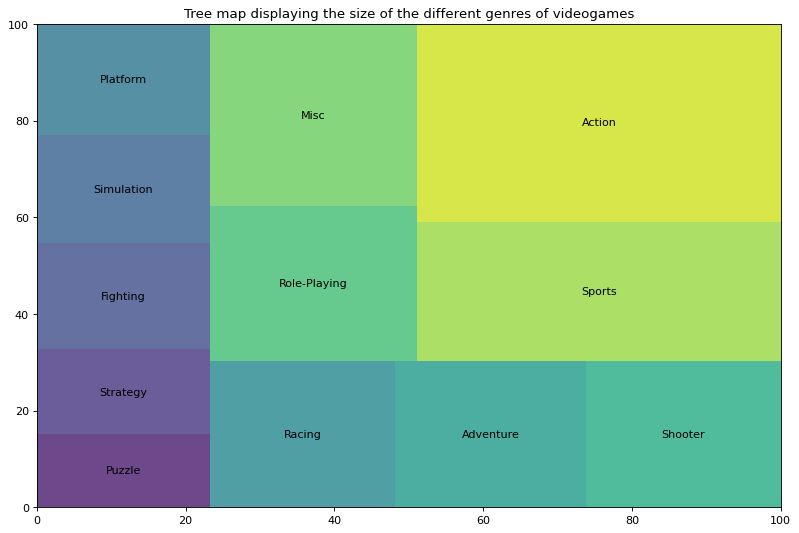

In [5]:
# Implement a tree map of the different genres 
plt.figure(figsize=(12,8), dpi= 80)
plt.title('Tree map displaying the size of the different genres of videogames')
squarify.plot(sizes=df['Genre'].value_counts().sort_values(),
              label=df['Genre'].value_counts().sort_values().index,
              color = sns.color_palette('viridis',len(df['Genre'].value_counts().sort_values().index)),
              alpha=.8)
# df['Genre'].value_counts().sort_values()

Action is clearly the most popular and puzzle the least. What would be intreseting though is to see the sales of video games below the 100k sales mark. Since it might be that the more "niche" games such as complex puzzle games are less popular but still a a valued market contribution to the total market.

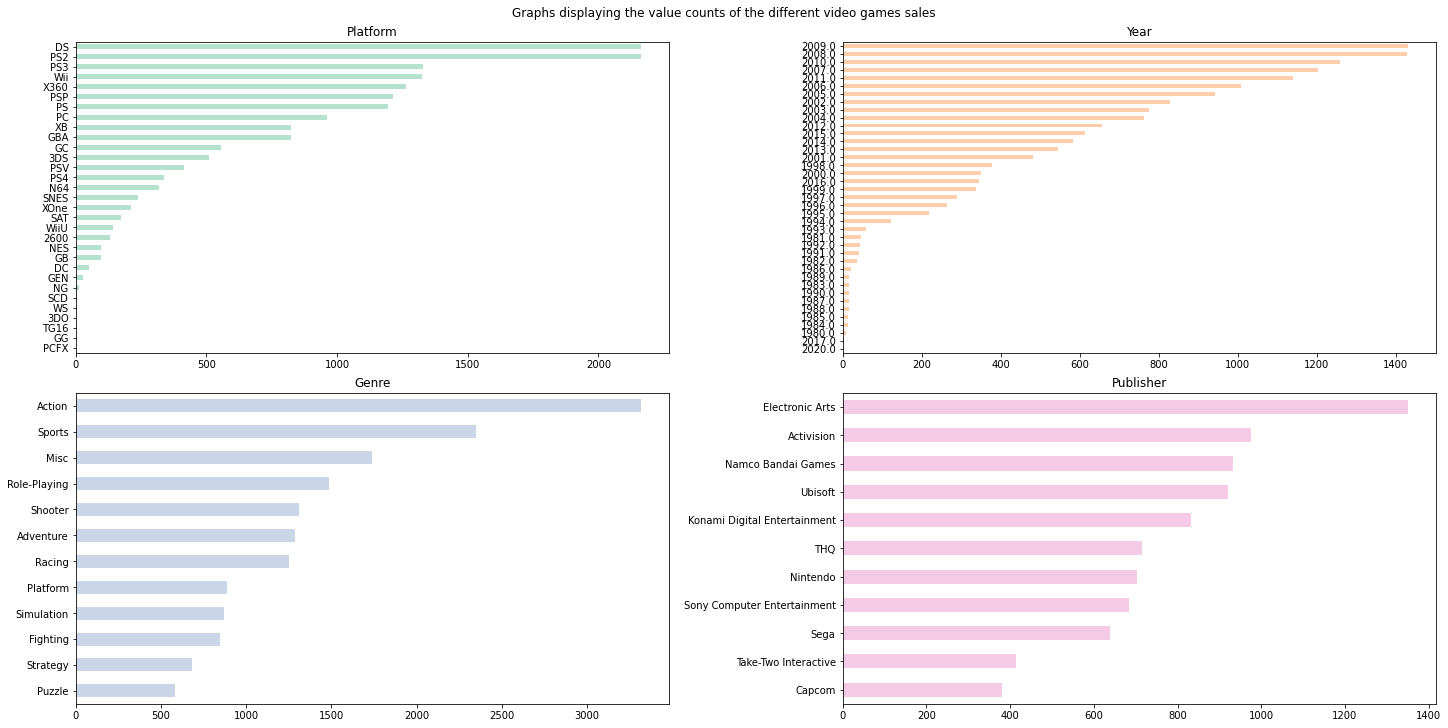

In [6]:
array = ['Platform', 'Year', 'Genre', 'Publisher']
cmap = matplotlib.cm.get_cmap('Pastel2')

plt.figure(figsize=(20,10),constrained_layout = True)
plt.suptitle('Graphs displaying the value counts of the different video games sales')
# plt.tight_layout()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(array[i])
    if i == 3:
        df[array[i]].value_counts().sort_values()[-11:].plot(kind = 'barh', color=cmap(i))
    else:
        df[array[i]].value_counts().sort_values().plot(kind = 'barh',color=cmap(i))
plt.show()

1. The plattform seem to be dominated by a handful. Plotting the value counts over time could extract valuable information. Same with the Publisher and the Genre. To reveal how these three categories have changed over time.

2. Plotting the year in chronological order will reveal how time has affect the general number of different games sold over 100k of sales. 
 
3. Cross comparing the sales with the year might reveal even though there might be less games sold with over 100k there might be higher amounts of dollar value sales



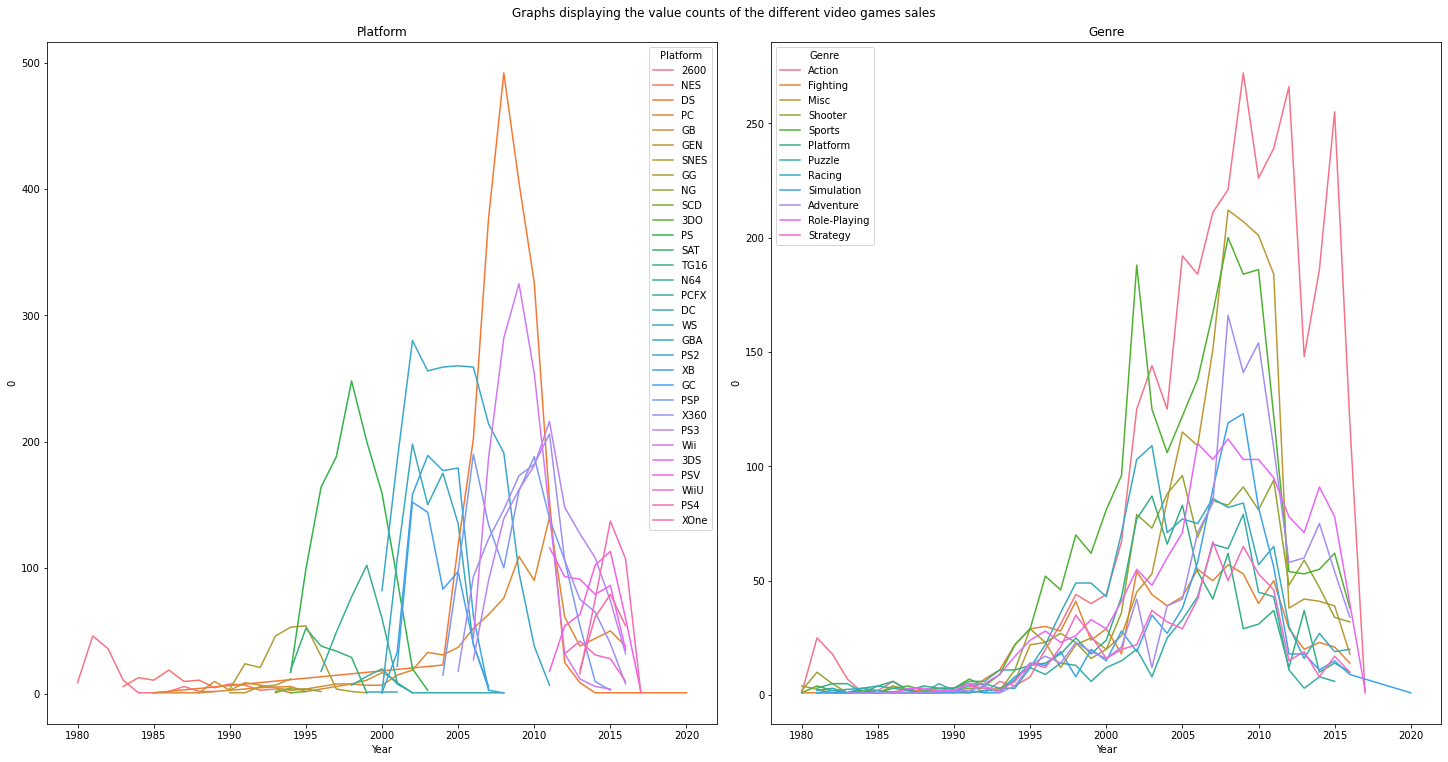

In [7]:
t_array = ['Platform', 'Genre', 'Publisher']

plt.figure(figsize=(20,20),constrained_layout = True)
plt.suptitle('Graphs displaying the value counts of the different video games sales')
# plt.tight_layout()
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.title(t_array[i])
    _df = pd.DataFrame(df[['Year',t_array[i]]].value_counts().sort_index()).reset_index()
    sns.lineplot(x='Year',y=0,hue=t_array[i],data=_df)

    
plt.show()

<AxesSubplot:title={'center':'Graph showing the count of the different publishers with over 100k sales of video games a year'}, xlabel='Year', ylabel='0'>

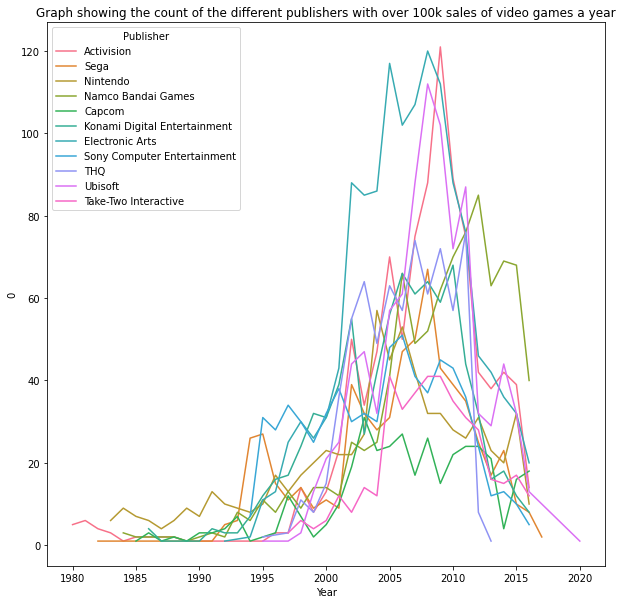

In [8]:
lis = df.Publisher.value_counts()[:11].index.tolist()

plt.figure(figsize=(10,10))
_df = pd.DataFrame(df[['Year','Publisher']].value_counts().sort_index()).reset_index()
plt.title('Graph showing the count of the different publishers with over 100k sales of video games a year')
# _df
sns.lineplot(x='Year',y=0,hue='Publisher',data=_df[_df['Publisher'].isin(lis)])


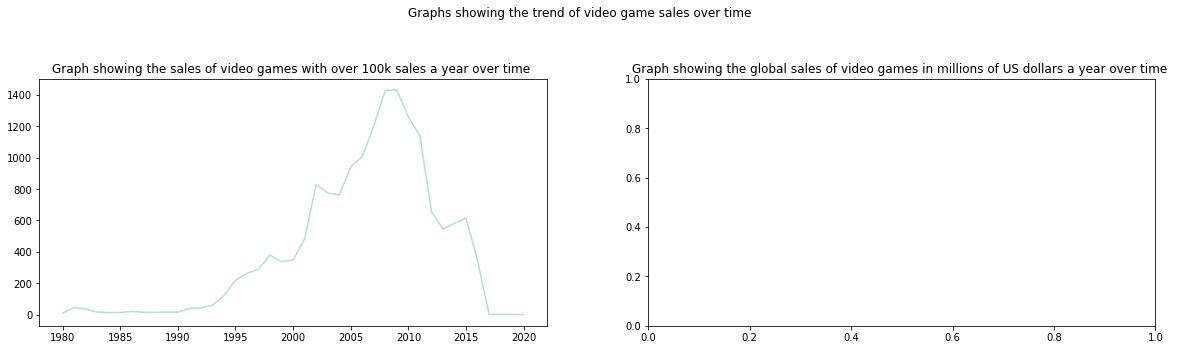

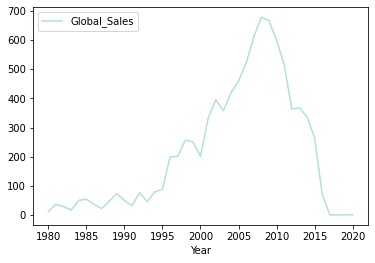

In [9]:
plt.figure(figsize=(20,10))
plt.suptitle('Graphs showing the trend of video game sales over time')

plt.subplot(2,2,1)
plt.title('Graph showing the sales of video games with over 100k sales a year over time ')
df['Year'].value_counts().sort_index().plot(kind = 'line',color=cmap(0))

plt.subplot(2,2,2)
plt.title('Graph showing the global sales of video games in millions of US dollars a year over time ')
df[['Year','Global_Sales']].groupby('Year').sum().plot(kind = 'line',color=cmap(0))

plt.show()

**I don't know why there is a second graph there but if anyone has a solution I woul be glad to know**

**The height of the video games was around 2009 and since then has been declining. Both in total sales and in total variety of sales. Does this mean video games are slowly becoming less popular?**

<AxesSubplot:title={'center':'Graph showing the sales of videogames with more than 100k sales worldwide sold over time'}, xlabel='Year'>

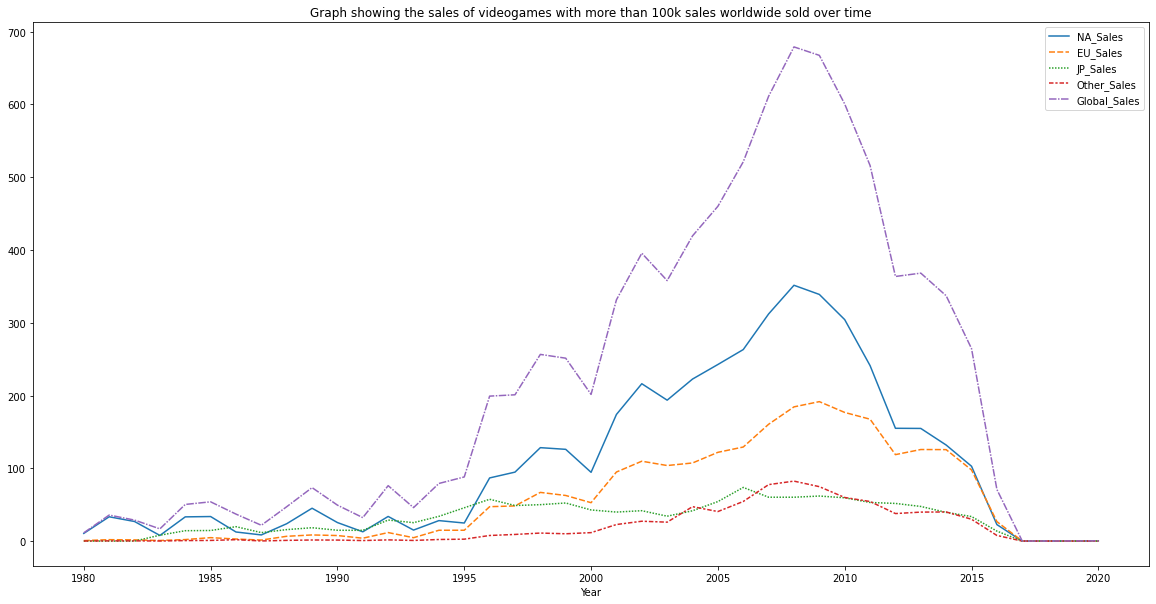

In [10]:
_df = df[['Year', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Year').sum()
plt.figure(figsize=(20,10))
plt.title('Graph showing the sales of videogames with more than 100k sales worldwide sold over time')
sns.lineplot(data=_df)
# df[['Year', 'Global_Sales']].groupby('Year').sum().plot(kind='line')

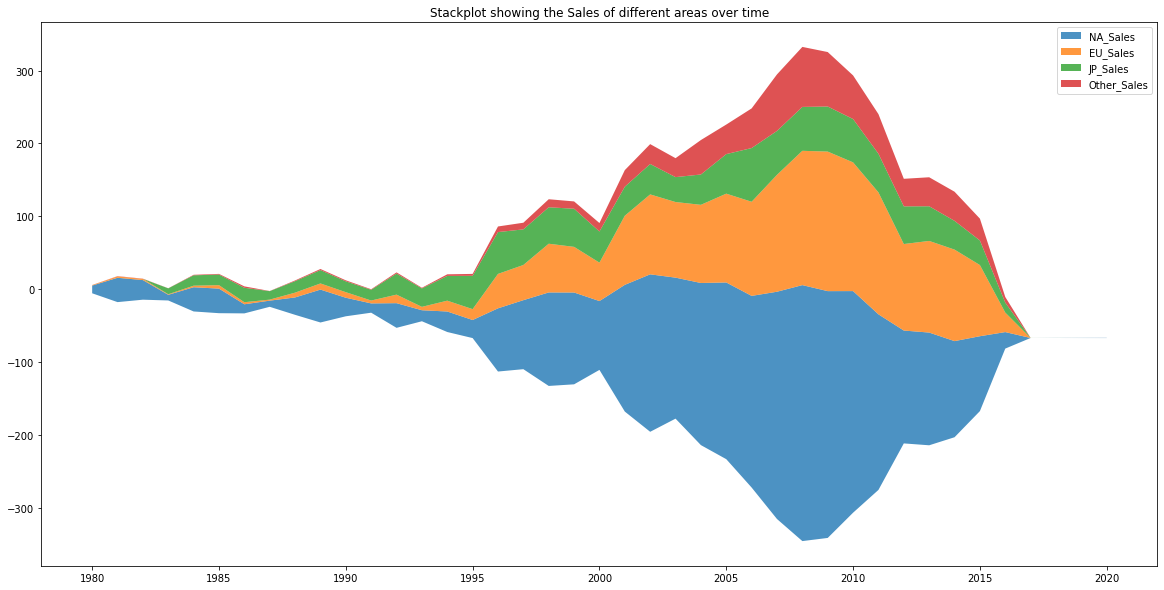

In [11]:
_df = df[['Year', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Year').sum()
_df.columns
# plt.figure(figsize=(20,10))

y0 = _df['NA_Sales'].values.tolist()
y1 = _df['EU_Sales'].values.tolist()
y2 = _df['JP_Sales'].values.tolist()
y3 = _df['Other_Sales'].values.tolist()

y = np.vstack([y0, y1, y2, y3])

plt.figure(figsize=(20,10))
plt.title('Stackplot showing the Sales of different areas over time')
plt.stackplot(_df.index, 
              y,
              labels=df.columns[6:-1].values.tolist(),
              baseline='weighted_wiggle',
              alpha=0.8)
plt.legend(df.columns[6:-1].values.tolist())
plt.show()

More than half of the sales are from NA. Showing that there is great potential in comsumer growth in all regions of the world. This may also be due to a lack of complete data.

# Final Thoughts

So are video total sales and the count of video games with over 100k sales decreasing? Or is that data incomplete? Have video Games reached their height and are now continously decreasing? Will the dying species of gamers survive until 2030? And if so how can we help them make a smooth transition into a peaceful afterlife? These are my final thoughts

If you foun this notebook helpful or have any suggestions to make feel more than free to comment:)